# Code: U21EC019

In [8]:
from tensorflow.keras.datasets import mnist
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt

In [9]:
print(tf.__version__)
print(tf.keras.__version__)
print(np.__version__)

2.12.0
2.12.0
1.26.4


In [10]:
import sklearn
print(sklearn.__version__)

1.2.2


In [24]:
data = mnist.load_data()

In [28]:
(X_train, y_train), (X_test, y_test) = data
classes = np.unique(y_train)
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [29]:
X_train.shape

(60000, 28, 28)

In [22]:
y_train.shape

(60000,)

In [14]:
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')
X_train = X_train / 255
X_test = X_test / 255
X_train.shape

(60000, 784)

In [15]:
model = Sequential()
model.add(Dense(784, input_dim = 28 * 28, activation= 'relu'))
model.add(Dense(10, activation= 'softmax'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 784)               615440    
                                                                 
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [18]:
model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 10s 10ms/step - loss: 0.2111 - sparse_categorical_accuracy: 0.9379
Epoch 2/10
938/938 [==============================] - 13s 14ms/step - loss: 0.0817 - sparse_categorical_accuracy: 0.9753
Epoch 3/10
938/938 [==============================] - 13s 14ms/step - loss: 0.0519 - sparse_categorical_accuracy: 0.9841
Epoch 4/10
938/938 [==============================] - 11s 12ms/step - loss: 0.0372 - sparse_categorical_accuracy: 0.9880
Epoch 5/10
938/938 [==============================] - 11s 11ms/step - loss: 0.0255 - sparse_categorical_accuracy: 0.9918
Epoch 6/10
938/938 [==============================] - 10s 10ms/step - loss: 0.0197 - sparse_categorical_accuracy: 0.9942
Epoch 7/10
938/938 [==============================] - 10s 10ms/step - loss: 0.0151 - sparse_categorical_accuracy: 0.9952
Epoch 8/10
938/938 [==============================] - 13s 14ms/step - loss: 0.0122 - sparse_categorical_accuracy: 0.9964
Epoch 9/10
938/938 [============

In [19]:
scores=model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0685 - sparse_categorical_accuracy: 0.9819


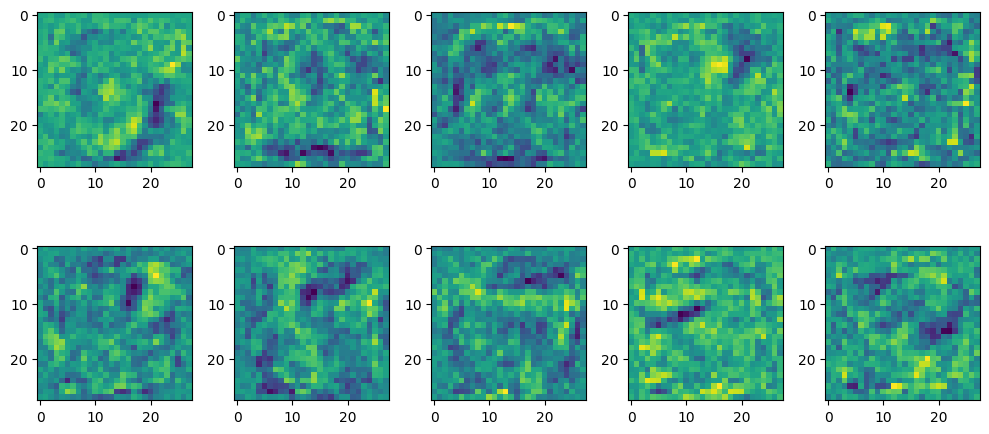

In [20]:
fig,axes=plt.subplots(2,5,figsize=(10,5))
weights,biases=model.layers[0].get_weights()
axes=axes.ravel()
for i in range(10):
    weight_img=weights[:,i].reshape(28,28)
    axes[i].imshow(weight_img,cmap='viridis')

plt.tight_layout()
plt.show()

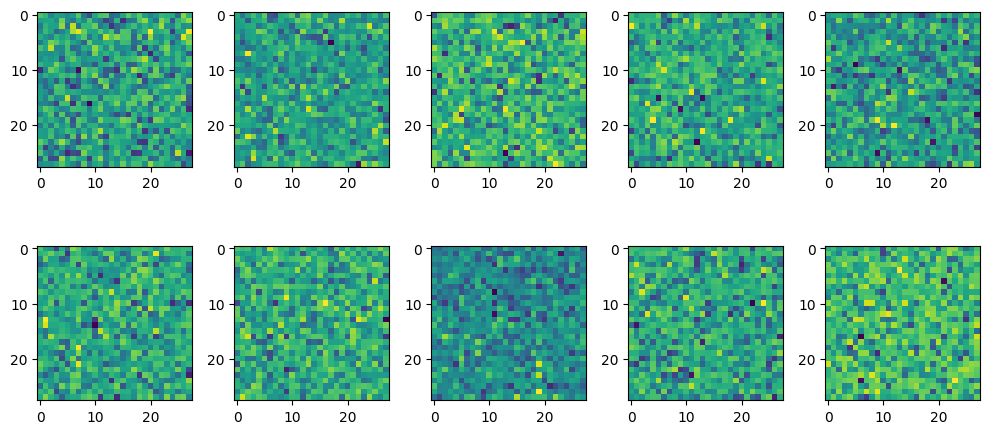

In [21]:
fig,axes=plt.subplots(2,5,figsize=(10,5))
weights,biases=model.layers[1].get_weights()
axes=axes.ravel()
for i in range(10):
    weight_img=weights[:,i].reshape(28,28)
    axes[i].imshow(weight_img,cmap='viridis')

plt.tight_layout()
plt.show()